In [3]:
import numpy as np
import matplotlib.pyplot as plt
import plotly 
import plotly.graph_objects as go
import plotly.io as pio
#pio.renderers.default = "vscode"



## Parameters

In [4]:
min_p = 0.1
max_p = 1

num_p = 10


## Prior


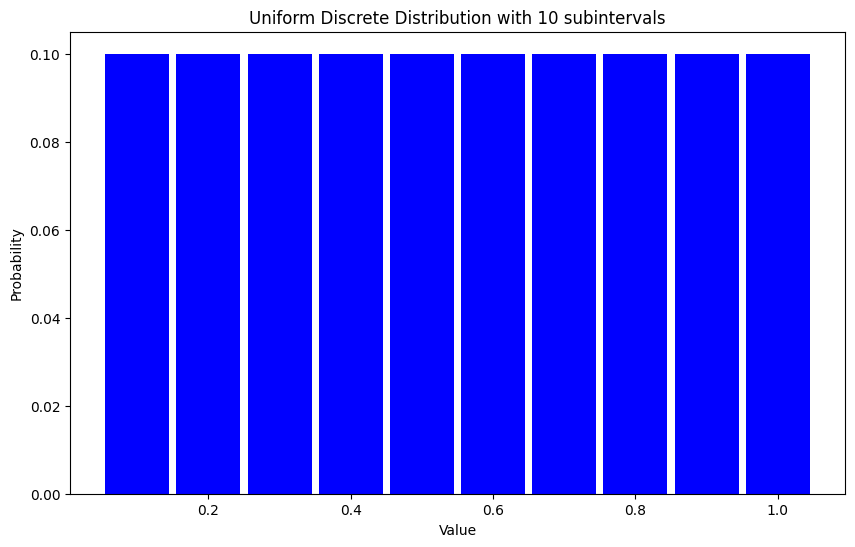

In [5]:

p = np.linspace(min_p, max_p, num_p)
prior_discrete = np.full(num_p,1/num_p)


# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(p, prior_discrete, color='blue', width=(max_p - min_p) / num_p)

# Labels and title
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title(f'Uniform Discrete Distribution with {num_p} subintervals')

# Show the plot
plt.show()


## Likelihood

In [6]:
n_events = 10
likelihood = np.full(num_p,p**n_events)

likelihood



array([1.00000000e-10, 1.02400000e-07, 5.90490000e-06, 1.04857600e-04,
       9.76562500e-04, 6.04661760e-03, 2.82475249e-02, 1.07374182e-01,
       3.48678440e-01, 1.00000000e+00])

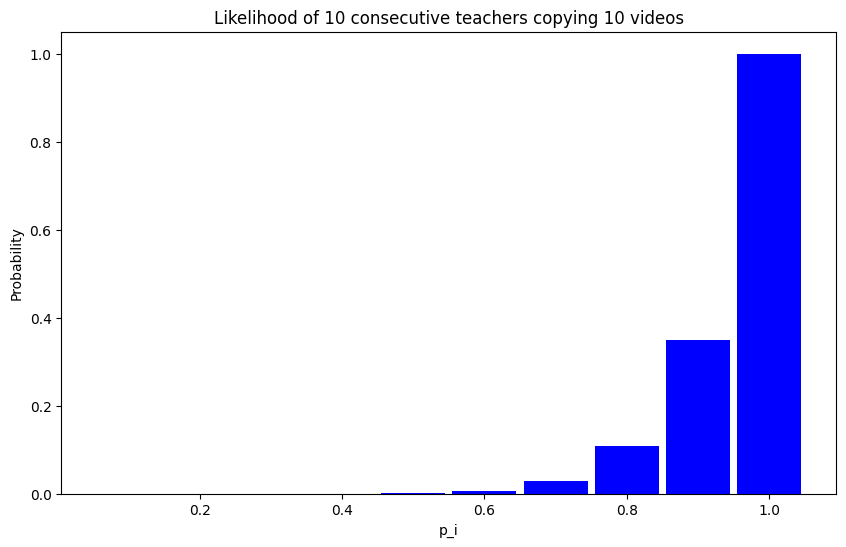

In [7]:
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(p, likelihood, color='blue', width=(max_p - min_p) / num_p)

# Labels and title
plt.xlabel('p_i')
plt.ylabel('Probability')
plt.title(f'Likelihood of {n_events} consecutive teachers copying {n_events} videos')

# Show the plot
plt.show()


## Estimation of Posterior

In [8]:
evidence = np.dot(prior_discrete, likelihood)
posterior = prior_discrete*likelihood/evidence


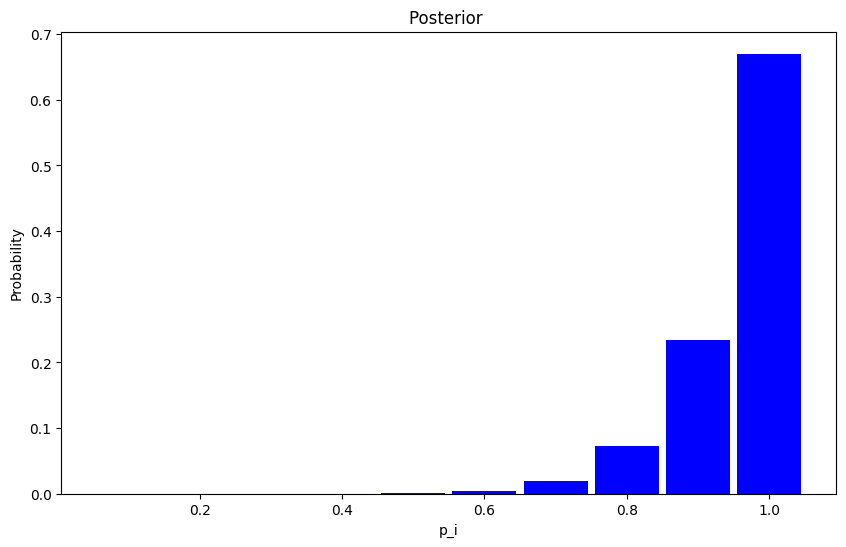

In [9]:
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(p, posterior, color='blue', width=(max_p - min_p) / num_p)

# Labels and title
plt.xlabel('p_i')
plt.ylabel('Probability')
plt.title(f'Posterior ')

# Show the plot
plt.show()

In [10]:
p_mean = np.dot(p,posterior)


## POSTERIOR AND EXPECTED VALUE 

Probability distribution of the posterior for different resolutions (subdivisions of the interval [0,1] used for the uniform prior)  
Expected value for a given evidence: the evidence always beeing x number of consecutive successes 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

# Function to compute posterior probability for a given number of intervals
def compute_posterior(n_intervals, ocurrences=10):
    # Discrete uniform prior over n_intervals between 0 and 1
    p_values = np.linspace(0, 1, n_intervals)
    prior = np.ones(n_intervals) / n_intervals  # uniform prior
    likelihood = p_values**ocurrences  # likelihood for 5 heads
    unnormalized_posterior = likelihood * prior
    
    # Normalize the posterior
    posterior = unnormalized_posterior / np.sum(unnormalized_posterior)
    
    # Compute the expected value (mean) of p
    expected_value = np.dot(p_values, posterior)
    
    # Plot the posterior distribution as a barplot
    fig, ax = plt.subplots(figsize=(16, 6))
    
    # Barplot of the posterior
    ax.bar(p_values, posterior, width=1.0/n_intervals, align='edge', color='b', alpha=0.7)
    ax.set_title(f'Posterior Probability Distribution ({ocurrences} copies)')
    ax.set_xlabel('Probability of Copies (p)')
    ax.set_ylabel('Posterior Probability')
    #ax.grid(True)
    
    # Display the expected value of p as text in a box
    ax.text(1, 0.9, f'Expected Value: {expected_value:.3f}', 
            transform=ax.transAxes, fontsize=12, verticalalignment='top',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

    plt.tight_layout()
    plt.show()

# Create an interactive slider
interact(compute_posterior, n_intervals=widgets.IntSlider(min=10, max=300, step=10, value=10), ocurrences=widgets.IntSlider(min=0, max=10, step=1, value=2) );



interactive(children=(IntSlider(value=10, description='n_intervals', max=300, min=10, step=10), IntSlider(valu…

In [18]:
import numpy as np
import plotly.graph_objects as go
from ipywidgets import interact
import ipywidgets as widgets

# Function to compute posterior probability for a given number of intervals
def compute_posterior(n_intervals, ocurrences=10):
    # Discrete uniform prior over n_intervals between 0 and 1
    p_values = np.linspace(0, 1, n_intervals)
    prior = np.ones(n_intervals) / n_intervals  # uniform prior
    likelihood = p_values**ocurrences  # likelihood for a given number of occurrences
    unnormalized_posterior = likelihood * prior
    
    # Normalize the posterior
    posterior = unnormalized_posterior / np.sum(unnormalized_posterior)
    
    # Compute the expected value (mean) of p
    expected_value = np.dot(p_values, posterior)
    
    # Create the Plotly bar chart
    fig = go.Figure()

    # Add the posterior as a bar plot, setting bars to blue
    fig.add_trace(go.Bar(
        x=p_values,
        y=posterior,
        marker_color='rgba(0, 0, 255, 0.7)',  # Blue color
        name="Posterior",
        width=1.0/n_intervals
    ))
    
    # Add the expected value text annotation
    fig.add_annotation(
        x=0.9, y=0.9,
        text=f"Expected Value: {expected_value:.3f}",
        showarrow=False,
        font=dict(size=12),
        align="center",
        bgcolor="white",
        borderpad=4
    )
    
    # Update layout with dynamic y-axis range
    fig.update_layout(
        title=f"Posterior Probability Distribution ({ocurrences} occurrences)",
        xaxis_title="Probability of Copies (p)",
        yaxis_title="Posterior Probability",
        showlegend=False,
        height=600,
        margin=dict(t=40, b=40, l=40, r=40)
    )
    
    # Dynamically adjust the y-axis range based on the maximum value of the posterior
    fig.update_yaxes(range=[0, max(posterior) * 1.1])
    
    # Show the plot
    fig.show()

# Create an interactive slider
interact(compute_posterior, 
         n_intervals=widgets.IntSlider(min=10, max=300, step=10, value=10), 
         ocurrences=widgets.IntSlider(min=0, max=10, step=1, value=2));


interactive(children=(IntSlider(value=10, description='n_intervals', max=300, min=10, step=10), IntSlider(valu…